In [4]:
pip install matplotlib Seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../Dataset/Cleaned/combinedCleanedData_20240709_145255.csv')

print(df.head())




               Name      Joined  International Reputation  Height  \
0         L. Suárez  2020-09-25                       5.0  182.88   
1      K. De Bruyne  2015-08-30                       4.0  180.34   
2   Bruno Fernandes  2020-01-30                       2.0  177.80   
3      A. Griezmann  2019-07-12                       4.0  175.26   
4          M. Acuña  2020-09-14                       2.0  172.72   

   Release Clause  Potential     Weight       Work Rate      Wage  \
0      64600000.0         87  86.182480    High/ Medium  115000.0   
1     161000000.0         91  69.853168      High/ High  370000.0   
2     124400000.0         90  68.945984      High/ High  195000.0   
3     103500000.0         87  73.028312  Medium/ Medium  290000.0   
4      46200000.0         83  68.945984      High/ High   41000.0   

                Club  ...       Value  Nationality Skill Moves  \
0    Atlético Madrid  ...  31500000.0      Uruguay         3.0   
1    Manchester City  ...  87000000.0 

In [6]:
# Function to check for missing values
def check_missing_values(df, name):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"Remaining missing values in {name} Data:")
        print(missing)
    else:
        print(f"No missing values in {name} Data.")

# Check for missing values
check_missing_values(df, "Combined")


Remaining missing values in Combined Data:
Contract Valid Until    2748
dtype: int64


In [7]:
# Function to check data types
def check_data_types(df):
    print("Data types:")
    print(df.dtypes)
    print("\n")

# Check data types
check_data_types(df)


Data types:
Name                         object
Joined                       object
International Reputation    float64
Height                      float64
Release Clause              float64
Potential                     int64
Weight                      float64
Work Rate                    object
Wage                        float64
Club                         object
ID                            int64
Value                       float64
Nationality                  object
Skill Moves                 float64
Contract Valid Until         object
Overall                       int64
Weak Foot                   float64
Age                           int64
Best Overall Rating         float64
Position                     object
Preferred Foot               object
dtype: object




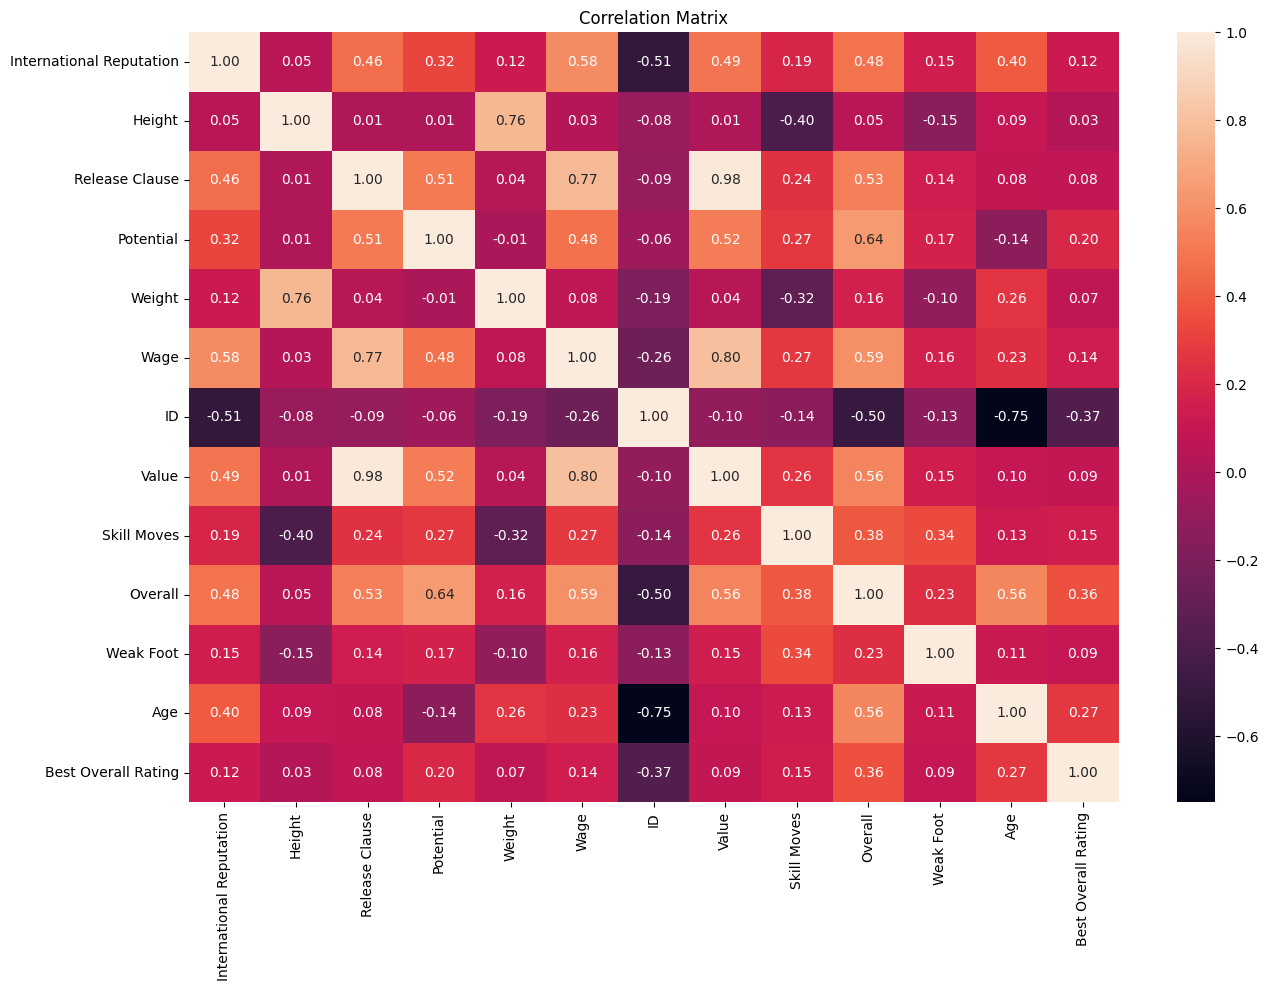

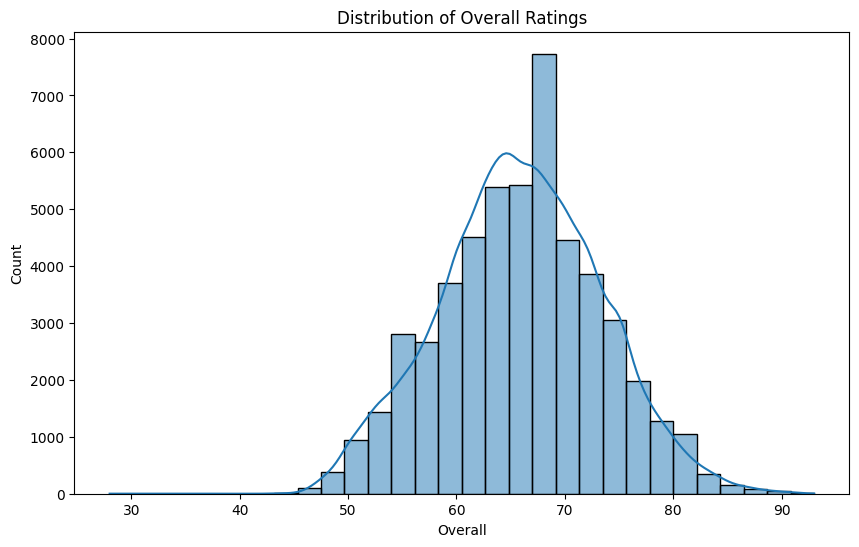

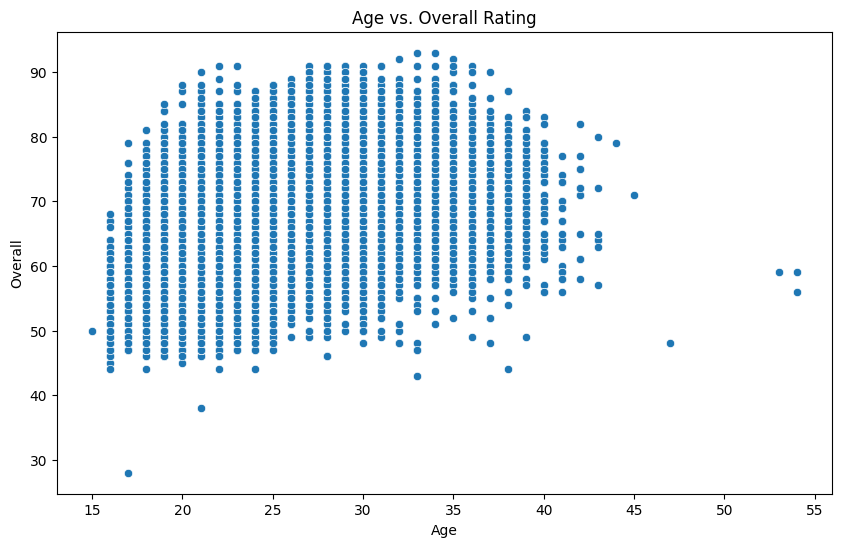

In [8]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Distribution of Overall ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Overall'], bins=30, kde=True)
plt.title('Distribution of Overall Ratings')
plt.show()

# Scatter plot for Age vs. Overall
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Overall', data=df)
plt.title('Age vs. Overall Rating')
plt.show()

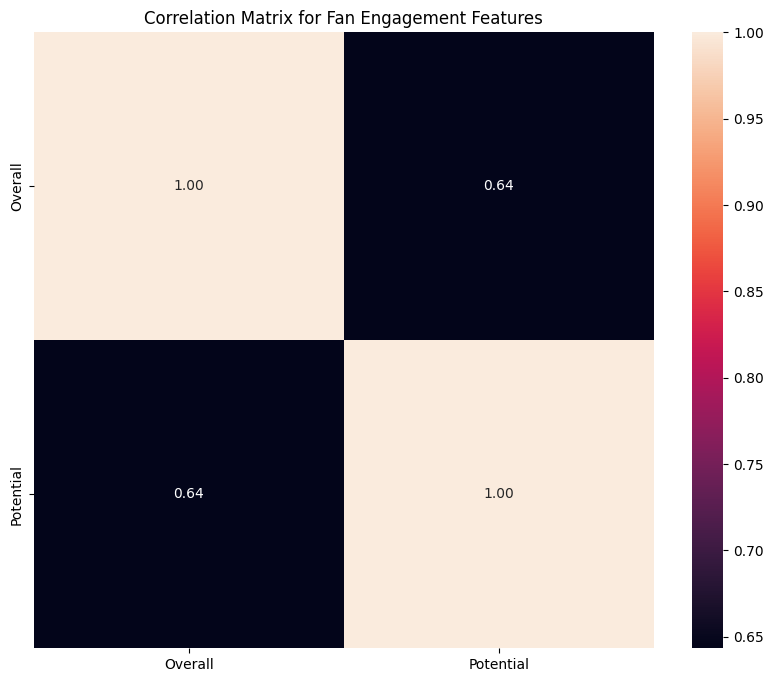

In [10]:
# Example features for predicting fan engagement and merchandise sales
features_fan_engagement = ['Overall', 'Potential']
# Assuming a 'Merchandise_Sales' column exists in the dataset
X_fan_engagement = df[features_fan_engagement]

def plot_correlation_matrix(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_matrix(X_fan_engagement, 'Correlation Matrix for Fan Engagement Features')


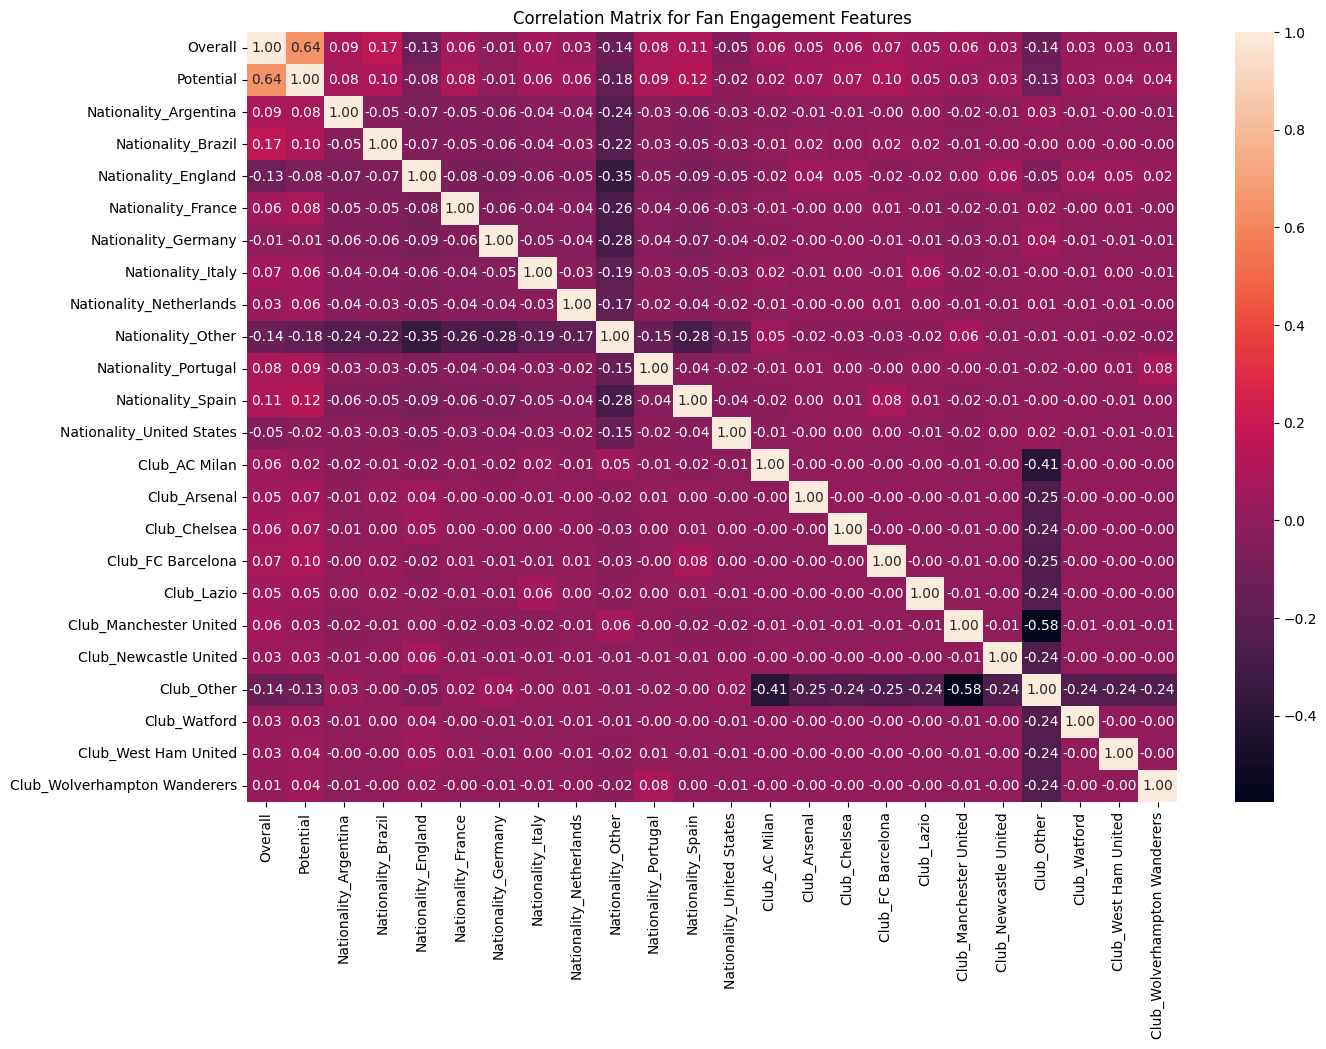

In [11]:
# Example features for predicting fan engagement and merchandise sales
features_fan_engagement = ['Overall', 'Potential', 'Nationality', 'Club']
# Limit to top N categories for Nationality and Club
top_n_nationalities = df['Nationality'].value_counts().index[:10]
top_n_clubs = df['Club'].value_counts().index[:10]

df['Nationality'] = df['Nationality'].apply(lambda x: x if x in top_n_nationalities else 'Other')
df['Club'] = df['Club'].apply(lambda x: x if x in top_n_clubs else 'Other')

# One-hot encode categorical variables
X_fan_engagement = pd.get_dummies(df[features_fan_engagement])

def plot_correlation_matrix(data, title):
    plt.figure(figsize=(15,10))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_matrix(X_fan_engagement, 'Correlation Matrix for Fan Engagement Features')

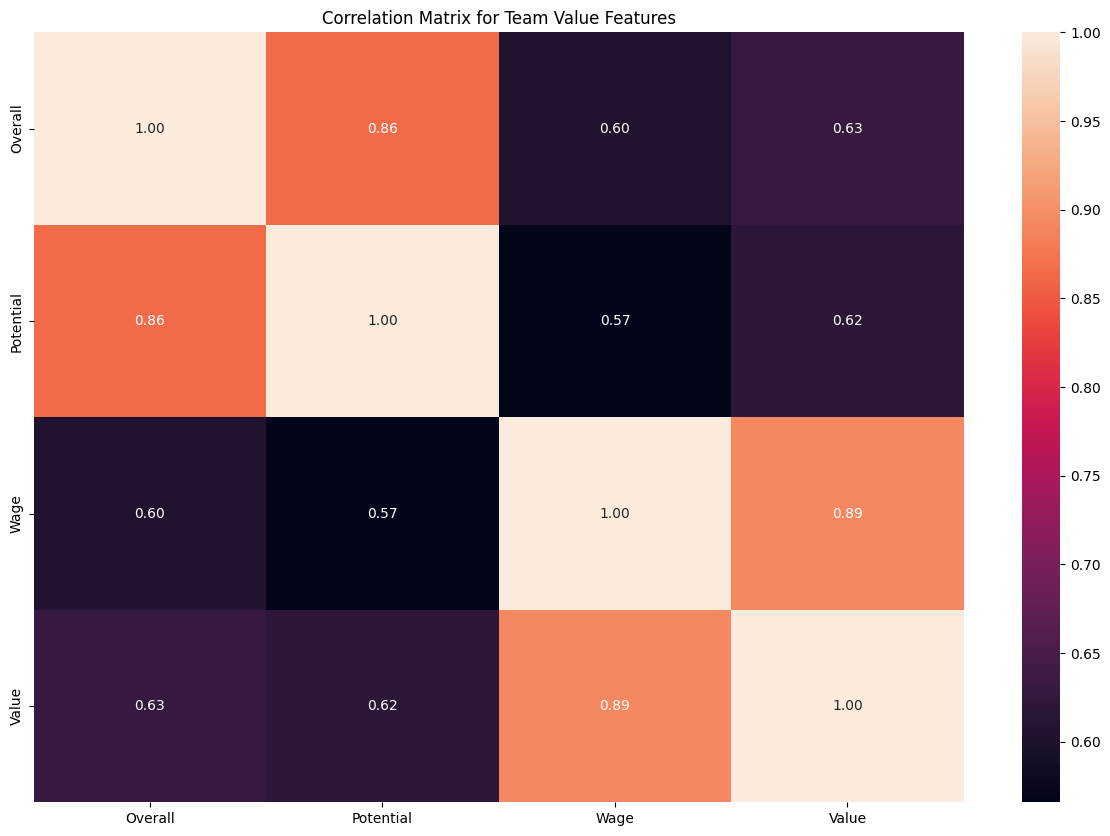

In [14]:
# Example features for predicting team value
features_team_value = ['Overall', 'Potential', 'Wage', 'Value']
X_team_value = df[features_team_value].groupby(df['Club']).mean()

plot_correlation_matrix(X_team_value, 'Correlation Matrix for Team Value Features')


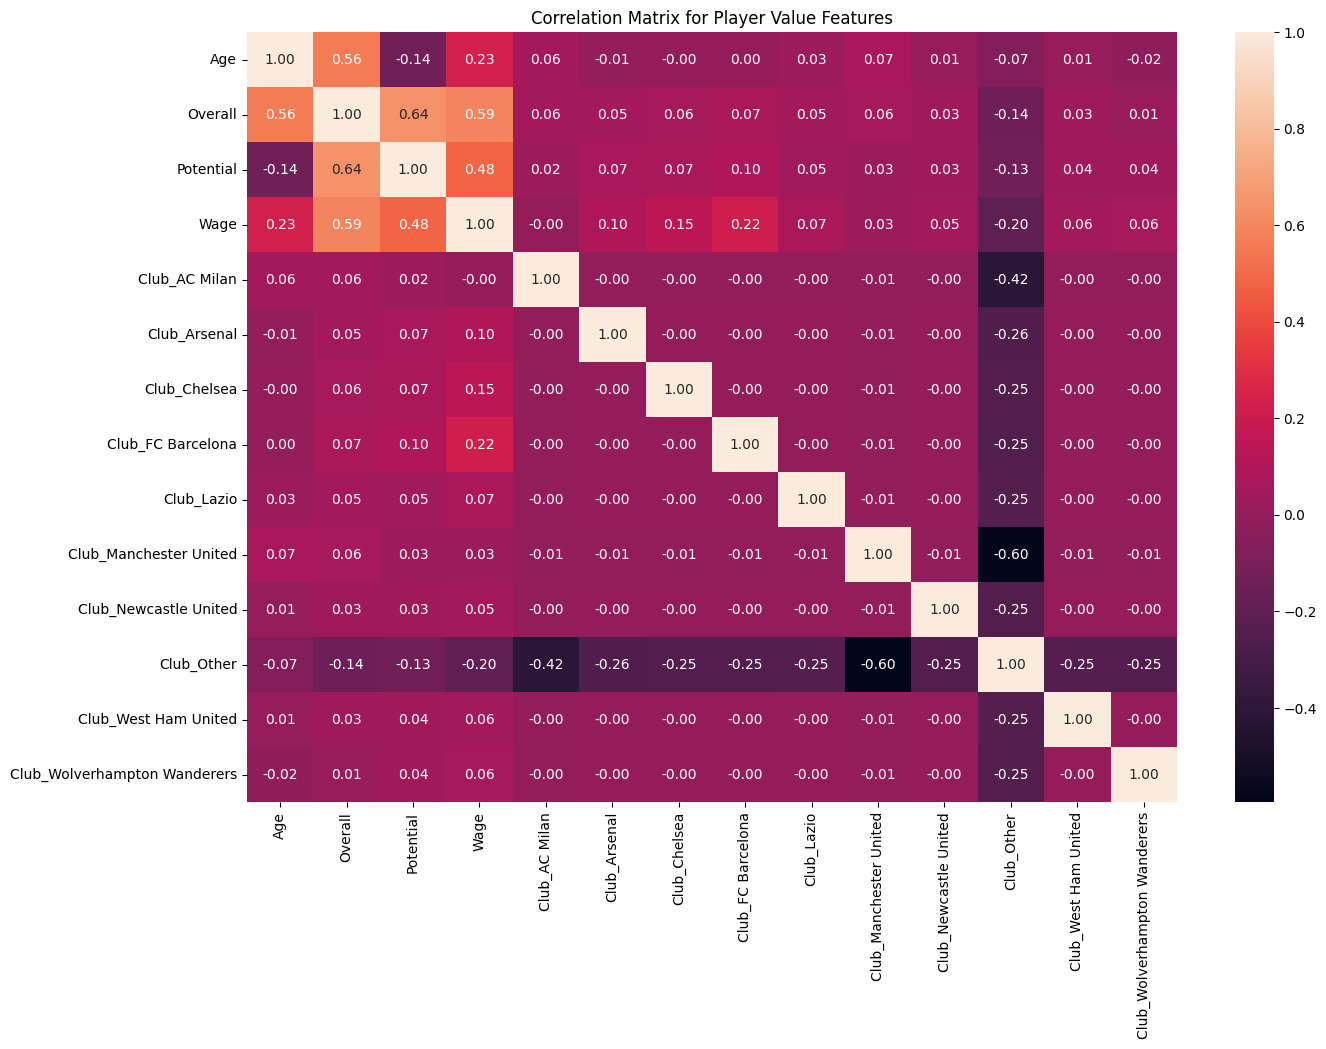

In [19]:
# Example features for predicting player value
features_player_value = ['Age', 'Overall', 'Potential', 'Club', 'Wage']

# Limit the number of unique clubs for faster processing
top_clubs = df['Club'].value_counts().index[:10]
df['Club'] = df['Club'].apply(lambda x: x if x in top_clubs else 'Other')

# One-hot encode the Club feature
X_player_value = pd.get_dummies(df[features_player_value])

# Plot correlation matrix
def plot_correlation_matrix(data, title):
    plt.figure(figsize=(15,10))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_matrix(X_player_value, 'Correlation Matrix for Player Value Features')